# DecisionTreeImplementation(Gini_Gain)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pymongo
from pymongo import MongoClient
client = MongoClient('localhost',27017)
db = client.BankData
collection = db.Data

In [2]:
df = pd.DataFrame(list(collection.find()))

# DataSet Imported From MongoDB

In [3]:
doc=collection.find().limit(5)
for d in doc:
    print(d)

{'_id': ObjectId('5a4b23a15e5f5465b9fbbba4'), 'RowNumber': 1, 'CustomerId': 15634602, 'Surname': 'Hargrave', 'CreditScore': 619, 'Geography': 'France', 'Gender': 'Female', 'Age': 42, 'Tenure': 2, 'Balance': 0, 'NumOfProducts': 1, 'HasCrCard': 1, 'IsActiveMember': 1, 'EstimatedSalary': 101348.88, 'Exited': 1}
{'_id': ObjectId('5a4b23a15e5f5465b9fbbba5'), 'RowNumber': 3, 'CustomerId': 15619304, 'Surname': 'Onio', 'CreditScore': 502, 'Geography': 'France', 'Gender': 'Female', 'Age': 42, 'Tenure': 8, 'Balance': 159660.8, 'NumOfProducts': 3, 'HasCrCard': 1, 'IsActiveMember': 0, 'EstimatedSalary': 113931.57, 'Exited': 1}
{'_id': ObjectId('5a4b23a15e5f5465b9fbbba6'), 'RowNumber': 4, 'CustomerId': 15701354, 'Surname': 'Boni', 'CreditScore': 699, 'Geography': 'France', 'Gender': 'Female', 'Age': 39, 'Tenure': 1, 'Balance': 0, 'NumOfProducts': 2, 'HasCrCard': 0, 'IsActiveMember': 0, 'EstimatedSalary': 93826.63, 'Exited': 0}
{'_id': ObjectId('5a4b23a15e5f5465b9fbbba7'), 'RowNumber': 2, 'CustomerI

# DataSet

In [4]:
df.head(5)

,Age,Balance,CreditScore,CustomerId,EstimatedSalary,Exited,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,RowNumber,Surname,Tenure,_id
0,42,0.00,619,15634602,101348.88,1,Female,France,1,1,1,1,Hargrave,2,5a4b23a15e5f5465b9fbbba4
1,42,159660.80,502,15619304,113931.57,1,Female,France,1,0,3,3,Onio,8,5a4b23a15e5f5465b9fbbba5
2,39,0.00,699,15701354,93826.63,0,Female,France,0,0,2,4,Boni,1,5a4b23a15e5f5465b9fbbba6
3,41,83807.86,608,15647311,112542.58,0,Female,Spain,0,1,1,2,Hill,1,5a4b23a15e5f5465b9fbbba7
4,43,125510.82,850,15737888,79084.10,0,Female,Spain,1,1,1,5,Mitchell,2,5a4b23a15e5f5465b9fbbba8


In [5]:
df.dtypes

Age                  int64
Balance            float64
CreditScore          int64
CustomerId           int64
EstimatedSalary    float64
Exited               int64
Gender              object
Geography           object
HasCrCard            int64
IsActiveMember       int64
NumOfProducts        int64
RowNumber            int64
Surname             object
Tenure               int64
_id                 object
dtype: object

In [6]:
df['Exited'] = df['Exited'].astype(float)

In [7]:
df.drop(['RowNumber','Surname','_id','CustomerId'],1, inplace=True)

In [8]:
df_md=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [9]:
target_name = 'Exited'
feat_names = df_md.drop(['Exited'],axis=1).columns
X = df_md.drop('Exited', axis=1)
Y = df_md[['Exited']]

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree



D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [12]:
#import sklearn
#from sklearn import model_selection
#kfold = model_selection.KFold(n_splits=10, random_state=3)
#model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
#results = model_selection.cross_val_score(model,X_train, y_train, cv=kfold)
#print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

In [13]:
#help(results)

# Model Creation & It's Performance

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#clf_gini.predict([[45,91549.8,765,47139.4,1,1,1,2,0,1,0]])

In [16]:
#import graphviz 
#
#from sklearn import tree
#
#
#dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                         feature_names=feat_names,  
#                         class_names='Exited',  
#                         filled=True, rounded=True,  
#                         special_characters=True)  
#
#graph = graphviz.Source(dot_data) 
#graph

In [17]:
y_pred = clf_gini.predict(X_test)
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

Confusion Metrics

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2068,  325],
       [ 311,  296]], dtype=int64)

Model Accuracy_Score

In [19]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  78.8


In [20]:
#result = clf_gini.score(X_test, y_test)
#print("Accuracy: %.3f%%" % (result*100.0))

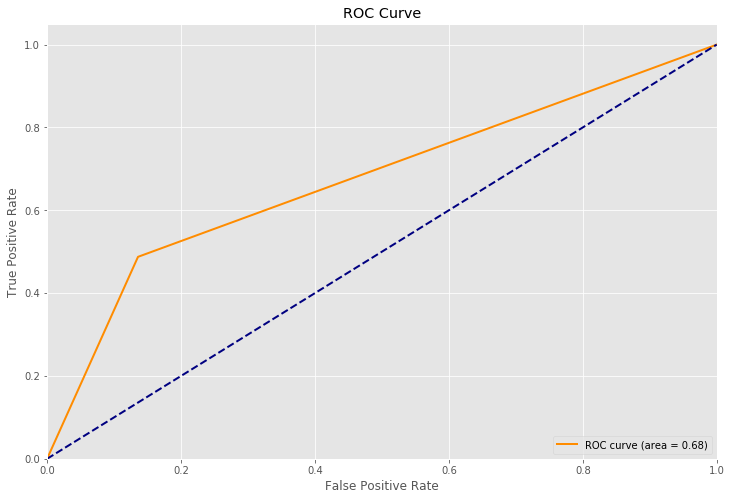

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Y_predict_probabilities = clf_gini.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, Y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
y_test['Predicted'] = y_pred
#y_test.drop(['Exited'],1, inplace=True)


In [23]:
y_test.head(10)

,Exited,Predicted
8018,0.0,0.0
9225,0.0,0.0
3854,0.0,0.0
2029,0.0,1.0
3539,0.0,0.0
1942,0.0,0.0
1250,0.0,0.0
2817,0.0,0.0
4211,0.0,0.0
477,0.0,0.0


# Customized_Data_Generation


In [24]:
import random

In [25]:
print("Enter the Values of Attributes for Generation of DataSet")

N=int(input("Enter Total Number of Record -> "))

ageLow=int(input("Enter Lower limit for Age -> "))
ageUp=int(input("Enter Upper limit for Age -> "))

balanceLow=float(input("Enter Lower limit for Balance -> "))
balanceUp=float(input("Enter Upper limit for Balance -> "))

creditLow=int(input("Enter Lower limit for CreditScore -> "))
creditUp=int(input("Enter Upper limit for CreditScore -> "))

estimatedLow=float(input("Enter Lower limit for EstimatedSalary -> "))
estimatedUp=float(input("Enter Upper limit for EstimatedSalary -> "))

male=int(input("Enter your Data % for Male -> "))
male=((male*N)/100)
malePer=int(male)

female=int(input("Enter your Data % for Female -> "))
female=((female*N)/100)
femalePer=int(female)

france=int(input("Enter your Data % for France -> "))
france=((france*N)/100)
francePer=int(france)

germany=int(input("Enter your Data % for Germany -> ")) 
germany=((germany*N)/100)
germanyPer=int(germany)

spain=int(input("Enter your Data % for Spain -> "))
spain=((spain*N)/100)
spainPer=int(spain)

noOfProductMin=int(input("Enter Minimum Number of Product -> "))
noOfProductMax=int(input("Enter Maximum Number of Product -> "))

tenureMin=int(input("Enter Minimum Tenure -> "))
tenureMax=int(input("Enter Maximum Tenure -> "))



dataPre = pd.DataFrame({'Age': np.random.randint(ageLow,ageUp+1,N),
                   'Balance':np.random.randint(balanceLow,balanceUp+1,N),
                   'CreditScore':np.random.randint(creditLow,creditUp+1,N),
                   'EstimatedSalary':np.random.randint(estimatedLow,estimatedUp+1,N),
                   "Gender":(["Male"]*malePer+ ["Female"]*femalePer),
                   "Geography":(['France']*francePer+['Germany']*germanyPer+['Spain']*spainPer),
                   "HasCrCard":np.random.randint(0,2,N),
                   "IsActiveMember":np.random.randint(0,2,N),
                   "NumOfProducts":np.random.randint(noOfProductMin,noOfProductMax+1,N),
                   "Tenure":np.random.randint(tenureMin,tenureMax+1,N)
                  },columns=['Age','Balance','CreditScore','EstimatedSalary','Gender','Geography','HasCrCard','IsActiveMember',
                            'NumOfProducts','Tenure'])

Enter the Values of Attributes for Generation of DataSet
Enter Total Number of Record -> 1000
Enter Lower limit for Age -> 18
Enter Upper limit for Age -> 72
Enter Lower limit for Balance -> 0
Enter Upper limit for Balance -> 200000
Enter Lower limit for CreditScore -> 300
Enter Upper limit for CreditScore -> 950
Enter Lower limit for EstimatedSalary -> 5000
Enter Upper limit for EstimatedSalary -> 200000
Enter your Data % for Male -> 45
Enter your Data % for Female -> 55
Enter your Data % for France -> 35
Enter your Data % for Germany -> 35
Enter your Data % for Spain -> 30
Enter Minimum Number of Product -> 1
Enter Maximum Number of Product -> 4
Enter Minimum Tenure -> 1
Enter Maximum Tenure -> 10


# Overview of Data Generated

In [26]:
#dataPre.dtypes

In [27]:
dataPre['Balance'] = dataPre['Balance'].astype(float)
dataPre['EstimatedSalary'] = dataPre['EstimatedSalary'].astype(float)

In [28]:
import sklearn.utils
dataPre1 = sklearn.utils.shuffle(dataPre.Gender)
dataPre2 = sklearn.utils.shuffle(dataPre.Geography)

In [29]:
dataPre1.tolist()
dataPre1 = np.asarray(dataPre1)

dataPre2.tolist()
dataPre2= np.asarray(dataPre2)

In [30]:
dataPre['Gender']=dataPre1
dataPre['Geography']= dataPre2

In [31]:
dataPre.head(5)

,Age,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,57,44504.0,454,26874.0,Male,Germany,1,1,2,4
1,55,162648.0,630,87405.0,Male,Germany,1,0,3,8
2,49,83004.0,482,105079.0,Female,Germany,1,0,1,10
3,28,169335.0,869,142448.0,Male,Germany,1,0,1,1
4,52,37479.0,333,149978.0,Female,Germany,0,1,4,2


In [32]:
dataPre_dm=pd.get_dummies(dataPre, columns=['Geography', 'Gender'], drop_first=True)

In [33]:
dataPre_dm=dataPre_dm.convert_objects(convert_numeric=True)

In [34]:
a=clf_gini.predict(dataPre_dm)


In [35]:
dataPre['Exited'] = a
dataPre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age                1000 non-null int32
Balance            1000 non-null float64
CreditScore        1000 non-null int32
EstimatedSalary    1000 non-null float64
Gender             1000 non-null object
Geography          1000 non-null object
HasCrCard          1000 non-null int32
IsActiveMember     1000 non-null int32
NumOfProducts      1000 non-null int32
Tenure             1000 non-null int32
Exited             1000 non-null float64
dtypes: float64(3), int32(6), object(2)
memory usage: 62.6+ KB


In [36]:
dataPre['Exited'] = dataPre['Exited'].astype(int)

In [37]:
#dataPre.to_csv("C:/Users/wn00112434/Desktop/TestData.csv")

# Real_time_Visualization_Bokeh

In [38]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_file, output_notebook
from bokeh.models import FactorRange, ColumnDataSource, PrintfTickFormatter, LabelSet
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

In [39]:
#from bokeh.models.widgets import CheckboxGroup, Tabs, Panel
#output_file('layout.html')
output_notebook()


Loading BokehJS ...

In [40]:
R_df = dataPre
R_df.head()

,Age,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,57,44504.0,454,26874.0,Male,Germany,1,1,2,4,0
1,55,162648.0,630,87405.0,Male,Germany,1,0,3,8,1
2,49,83004.0,482,105079.0,Female,Germany,1,0,1,10,1
3,28,169335.0,869,142448.0,Male,Germany,1,0,1,1,0
4,52,37479.0,333,149978.0,Female,Germany,0,1,4,2,1


In [41]:
Country= R_df.Geography.unique()
Count = []
draw = R_df.groupby(['Geography', 'Exited'])['Exited'].sum()
print(draw)
for i in draw :
    if (i!=0):
        Count.append(i)
    
Count

Geography  Exited
France     0           0
           1         224
Germany    0           0
           1         212
Spain      0           0
           1         171
Name: Exited, dtype: int32


[224, 212, 171]

In [42]:
ser = R_df['Geography'].value_counts()
#help(ser)
fr= ser.get('France')
EpercentFR= (Count[0]/fr)*100
NEpercentFR= 100-EpercentFR

gr= ser.get('Germany')
EpercentGR= (Count[1]/gr)*100
NEpercentGR= 100-EpercentGR

sp= ser.get('Spain')
EpercentSP= (Count[2]/sp)*100
NEpercentSp= 100-EpercentSP

EpercentFR = EpercentFR.astype('int64')
NEpercentFR = NEpercentFR.astype('int64')
EpercentGR = EpercentGR.astype('int64')
NEpercentGR = NEpercentGR.astype('int64')
EpercentSP = EpercentSP.astype('int64')
NEpercentSp = NEpercentSp.astype('int64')

In [43]:
EpercentFR

64

In [44]:
source1 = ColumnDataSource(data=dict(Country=Country, Count=Count))

In [45]:
p = figure(x_range=Country, plot_height=550, toolbar_location='right', title="No. Of Customers Exited")

labels1 = LabelSet(x='Country', y='Count', text='Count', level='glyph',
                 x_offset=-11.5, y_offset=0, source=source1, render_mode='canvas')

p.vbar(x='Country', top='Count', width=0.9, source=source1, legend="Country",
       line_color='white', fill_color=factor_cmap('Country', palette=Spectral6, factors=Country))

p.xgrid.grid_line_color = None
#p.y_range.start = 0
#p.y_range.end = 9
p.legend.orientation = "vertical"
p.legend.location = "bottom_right"
p.add_layout(labels1)

In [46]:
Country= R_df.Geography.unique()
Exited = ['yes', 'no']

data = {'Country' : Country,
        'yes'   : [EpercentFR, EpercentGR, EpercentSP],
        'no'   : [NEpercentFR, NEpercentGR, NEpercentSp]}

palette = ["#c9d9d3", "#718dbf"]
           
x = [ (Countries, Exits) for Countries in Country for Exits in Exited ]
counts = sum(zip(data['yes'], data['no']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p1 = figure(x_range=FactorRange(*x), plot_height=550, title="Percentage(Rounded-Off) of Exited By Country",
           toolbar_location='right')
#tl=counts*100
labels = LabelSet(x='x', y='counts', text='counts', level='glyph',
                 x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')


p1.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=Exited, start=1, end=2))

p1.y_range.start = 0
p1.x_range.range_padding = 0.1
p1.yaxis.formatter = PrintfTickFormatter(format='%0.00f %%')
p1.xaxis.major_label_orientation = 1
p1.xgrid.grid_line_color = None
p1.add_layout(labels)

In [47]:
grid = gridplot([p, p1], ncols=1, plot_width=480, plot_height=515)
show(grid)

# real_time_data

In [48]:
#import pandas as pd
#import warnings
#warnings.filterwarnings('ignore')
#import pymongo
#from pymongo import MongoClient
#client = MongoClient('localhost',27017)
#db = client.BankData
#collection = db.RealTime

In [49]:
#df_real = pd.DataFrame(list(collection.find()))
#df_act = pd.DataFrame(list(collection.find()))

In [50]:
#df_real.head(2)

In [51]:
#df_real.shape

In [52]:
#df_real.drop(['_id'],1, inplace=True)

In [53]:
#df_real_md=pd.get_dummies(df_real, columns=['Geography', 'Gender'], drop_first=True)

In [54]:
#df_real_md=df_real_md.convert_objects(convert_numeric=True)

In [55]:
#df_real_md.info()

In [56]:
#df_real_md.head(2)

In [57]:
#y_pred = clf_gini.predict([[45,91549.8,765,47139.4,1,1,1,2,0,1,0]])
#y_pred

In [58]:
#a=clf_gini.predict(df_real_md)
#a

In [59]:
#df_real['Exited'] = a
#df_real.info()

In [60]:
#df_real['Exited'] = df_real['Exited'].astype(int)

In [61]:
#df_real.tail(5)

In [62]:
#df_real.shape

In [63]:
#df_act = df_act.drop(['_id'], axis=1)

In [64]:
#path = r"D:\Project1\Churn_Real1.xlsx"
#writer = pd.ExcelWriter(path, engine='openpyxl')
#df_act.to_excel(writer, 'Actual', index=False)
#df_real.to_excel(writer, 'Predicted', index=False)
#writer.save()

# entropy

In [65]:
#X1_train, X1_test, y1_train, y1_test = train_test_split( X, Y, test_size = 0.25, random_state = 100)

In [66]:
#clf_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
#clf_entropy.fit(X1_train, y1_train)

In [67]:
#df_md.head(5)

In [68]:
#clf_entropy.predict([[42,159660.80,502,113931.57,1,0,3,8,0,0,0]])

In [69]:
#y1_pred_en = clf_entropy.predict(X1_test)
#y1_pred_en

In [70]:
#print("Accuracy is ", accuracy_score(y1_test,y1_pred_en)*100)

In [71]:
#result = clf_entropy.score(X1_test, y1_test)
#print("Accuracy: %.3f%%" % (result*100.0))

In [72]:
#from sklearn.metrics import roc_curve, auc
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#%matplotlib inline
#
#Y_predict_probabilities = clf_entropy.predict_proba(X1_test)[:,1]
#
#fpr, tpr, _ = roc_curve(y1_test, Y_predict_probabilities)
#roc_auc = auc(fpr, tpr)
#
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange',
#         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.legend(loc="lower right")
#plt.show()

In [73]:
#y1_test['Predicted'] = y1_pred_en
#y1_test

In [74]:
#import graphviz 
#from sklearn import tree
#
#
#dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
#                         feature_names=feat_names,  
#                         class_names='Exited',  
#                         filled=True, rounded=True,  
#                         special_characters=True)  
#
#graph = graphviz.Source(dot_data) 
#graph
